# Covariance and Correlation Computation in Python

## Setting up the environment

In [1]:
# For fetching data
import yfinance as yf

# For data manipulation
import pandas as pd
import numpy as np
import itertools
# For time series analysis
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# For data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



<ipython-input-1-8df2e0a3c5b8>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### Simulation of ARMA models

In [2]:
# Set the seed
np.random.seed(2022)

# Generate an normally-distributed random error time series
errors = np.random.normal(0, 0.1, 1000)

# Set the AR parameter array
arparams = np.array([.1, .25, .5, .75, .9, .99])

# Set the MA parameter array
maparams = np.array([-.1, -.25, -.5, -.75, -.9, -.99])

# Create an empty dataframe
df = pd.DataFrame(data = errors, columns=['errors'])

In [3]:
# Use a loop to create AR processes
for i in range(1000):
    # Set the first value of each ARMA model
    if i == 0:
        # Set the first value for each AR(1) model
        for ar in arparams:
            df[f'ARMA_1_0_0{str(ar)[2:]}_0'] = df['errors'].iloc[0]
        # Set the first value for each MA(1) model
        for ma in maparams:
            df[f'ARMA_0_1_0_0{str(ma)[3:]}'] = df['errors'].iloc[0]
        # Set the first value for the ARMA(1,1) model
        df[f'ARMA_1_1_03_03'] = df['errors'].iloc[0]

    # Create for each observation the AR(1) models' values
    for ar in arparams:
        df[f'ARMA_1_0_0{str(ar)[2:]}_0'].iloc[i] = ar * \
            df[f'ARMA_1_0_0{str(ar)[2:]}_0'].iloc[i-1] + df['errors'].iloc[i]

    # Create for each observation the MA(1) models' values
    for ma in maparams:
        df[f'ARMA_0_1_0_0{str(ma)[3:]}'].iloc[i] = df['errors'].iloc[i] + \
            ma*df['errors'].iloc[i-1]

    # Create for each observation the ARMA(1,1) model values
    df[f'ARMA_1_1_03_03'] = 0.3*df[f'ARMA_1_1_03_03'].iloc[i-1] + \
        df['errors'].iloc[i] + 0.3*df['errors'].iloc[i-1]

### ARMA model simulation graphs

FileNotFoundError: [Errno 2] No such file or directory: '/content/Figures/ARs_time_series.png'

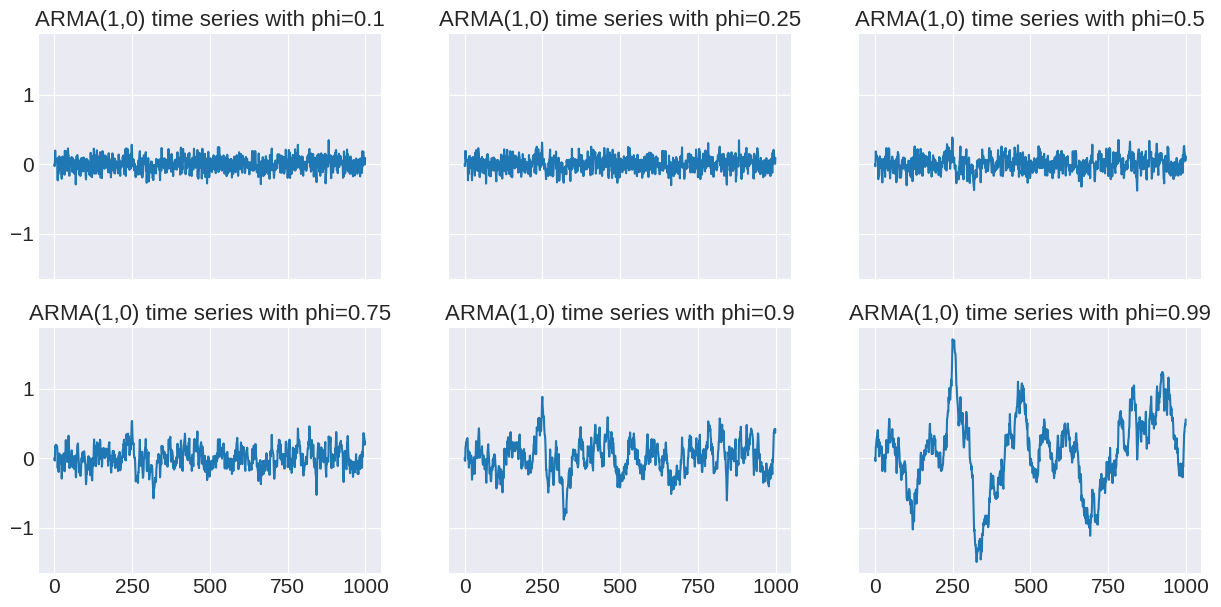

In [4]:
# Set the graphs into subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

# Set the parameters' values to plot as per each ARMA model
params = [1, 25, 5, 75, 9, 99]

# Create a loop to plot each ARMA model values
for param in params:
    # Plot the first 3 models in a separate row
    if params.index(param) < 3:
        # Plot the corresponding ARMA models
        axs[0, params.index(param)].plot(df.index, df[f'ARMA_1_0_0{param}_0'])
        # Set the tick label size
        axs[0, params.index(param)].tick_params(labelsize=15)
        # Set the title for each ARMA model
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) time series with phi=0.{param}', fontdict={'fontsize': 16})
    # Plot the last 3 models in the second plot row
    else:
        # Plot the corresponding ARMA models
        axs[1, (params.index(param)-3)].plot(df.index,
                                             df[f'ARMA_1_0_0{param}_0'])
        # Set the tick label size
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        # Set the title for each ARMA model
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) time series with phi=0.{param}', fontdict={'fontsize': 16})

plt.savefig('Figures/ARs_time_series.png', bbox_inches='tight')

plt.show()

### ARMA(1,0)s Autocorrelation Functions

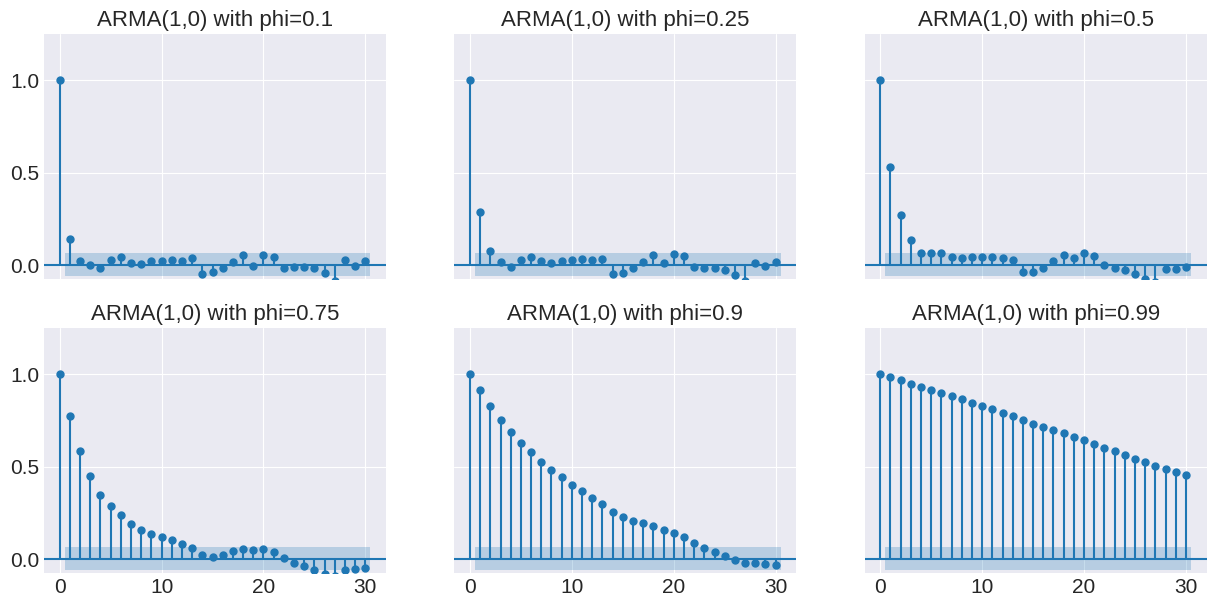

In [5]:
# Set the graphs into subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

# Set the parameters' values to plot as per each ARMA model
params = [1, 25, 5, 75, 9, 99]

# Create a loop to plot each AR model autocorrelation functions
for param in params:
    # Plot the first 3 models' autocorrelation functions in a separate row
    if params.index(param) < 3:
        # Plot the corresponding AR models' 30-lag autocorrelation functions
        sm.graphics.tsa.plot_acf(df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[0, params.index(
            param)], bartlett_confint=False, auto_ylims=True)
        # Set the tick label size
        axs[0, params.index(param)].tick_params(labelsize=15)
        # Set the title for each AR model
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})
    # Plot the last 3 models' autocorrelation functions in the second plot row
    else:
        # Plot the corresponding AR models' 30-lag autocorrelation functions
        sm.graphics.tsa.plot_acf(df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[1, (params.index(
            param)-3)], bartlett_confint=False, auto_ylims=True)
        # Set the tick label size
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        # Set the title for each AR model
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})



plt.show()

### ARMA(1,0)s Partial Autocorrelation Functions

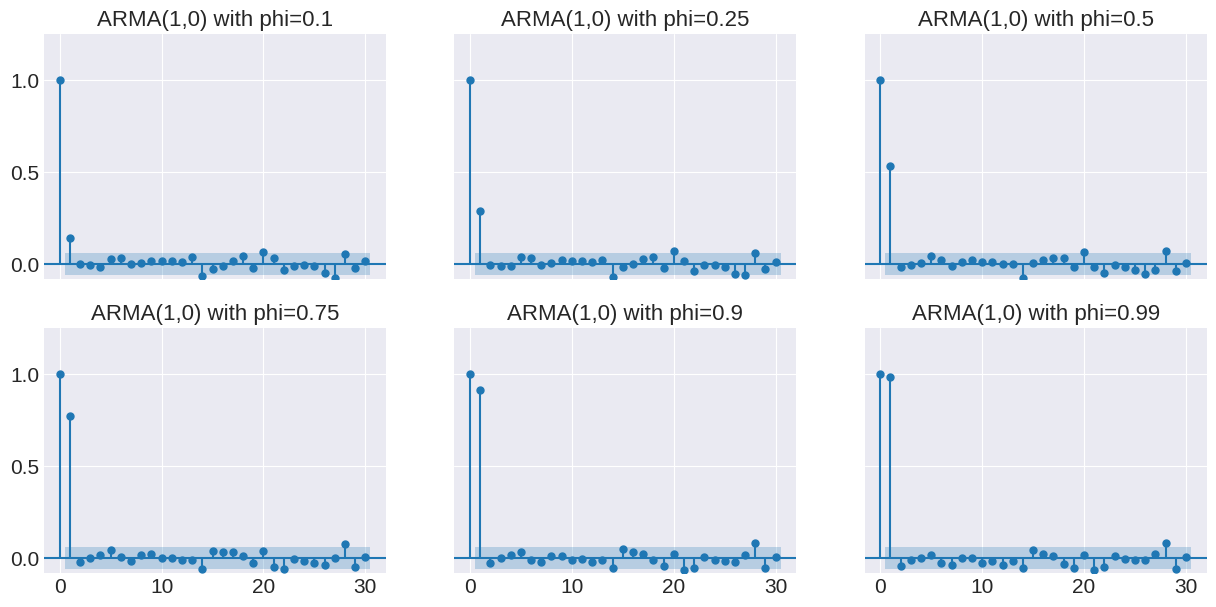

In [6]:
# Set the graphs into subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

# Set the parameters' values to plot as per each AR model
params = [1, 25, 5, 75, 9, 99]

# Create a loop to plot each AR model partial autocorrelation functions
for param in params:
    # Plot the first 3 models' partial autocorrelation functions in a separate row
    if params.index(param) < 3:
        # Plot the corresponding AR models' 30-lag partial autocorrelation functions
        sm.graphics.tsa.plot_pacf(
            df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[0, params.index(param)], auto_ylims=True)
        # Set the tick label size
        axs[0, params.index(param)].tick_params(labelsize=15)
        # Set the title for each AR model
        axs[0, params.index(param)].set_title(
            f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})
    # Plot the last 3 models' partial autocorrelation functions in the second plot row
    else:
        # Plot the corresponding AR models' 30-lag partial autocorrelation functions
        sm.graphics.tsa.plot_pacf(
            df[f'ARMA_1_0_0{param}_0'], lags=30, ax=axs[1, (params.index(param)-3)], auto_ylims=True)
        # Set the tick label size
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        # Set the title for each AR model
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(1,0) with phi=0.{param}', fontdict={'fontsize': 16})



plt.show()

### ARMA(0,1)s Autocorrelation Functions

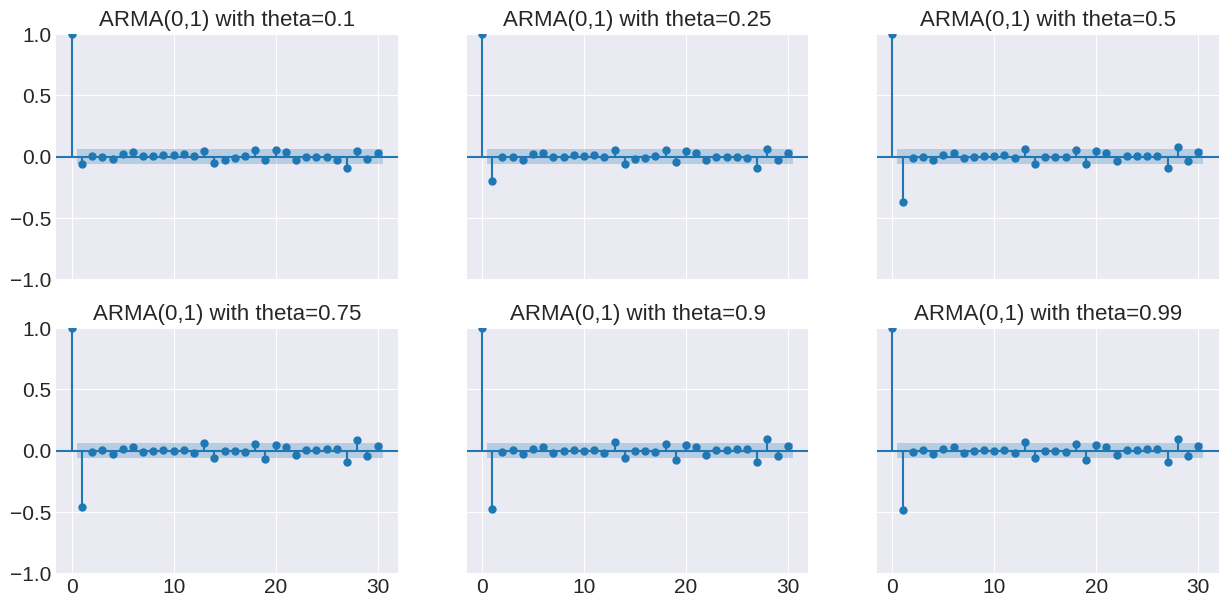

In [7]:
# Set the graphs into subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

# Set the parameters' values to plot as per each MA model
params = [1, 25, 5, 75, 9, 99]

# Create a loop to plot each MA model autocorrelation functions
for param in params:
    # Plot the first 3 models' autocorrelation functions in a separate row
    if params.index(param) < 3:
        # Plot the corresponding MA models' 30-lag autocorrelation functions
        sm.graphics.tsa.plot_acf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[0, params.index(
            param)], bartlett_confint=False)
        # Set the tick label size
        axs[0, params.index(param)].tick_params(labelsize=15)
        # Set the title for each MA model
        axs[0, params.index(param)].set_title(
            f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})
    # Plot the last 3 models' autocorrelation functions in the second plot row
    else:
        # Plot the corresponding MA models' 30-lag autocorrelation functions
        sm.graphics.tsa.plot_acf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[1, (params.index(
            param)-3)], bartlett_confint=False)
        # Set the tick label size
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        # Set the title for each MA model
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})



plt.show()

### ARMA(0,1)s Partial Autocorrelation Functions

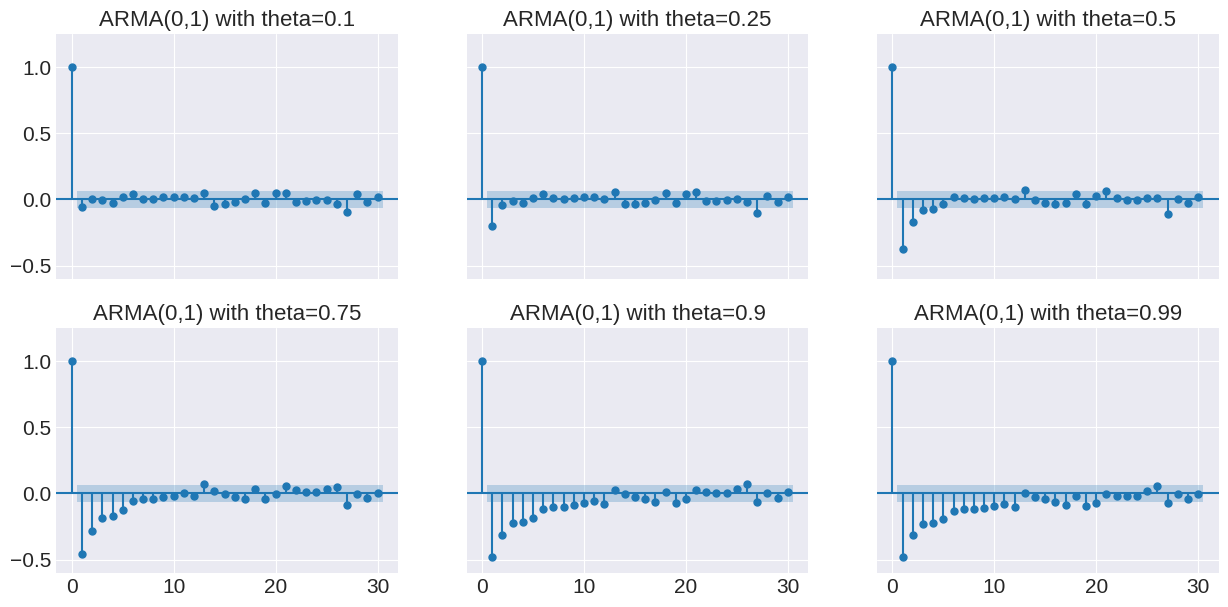

In [8]:
# Set the graphs into subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    15, 7), sharex=True, sharey=True)

# Set the parameters' values to plot as per each MA model
params = [1, 25, 5, 75, 9, 99]

# Create a loop to plot each MA model partial autocorrelation functions
for param in params:
    # Plot the first 3 models' partial autocorrelation functions in a separate row
    if params.index(param) < 3:
        # Plot the corresponding MA models' 30-lag partial autocorrelation functions
        sm.graphics.tsa.plot_pacf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[0, params.index(
            param)], method='ywm', auto_ylims=True)
        # Set the tick label size
        axs[0, params.index(param)].tick_params(labelsize=15)
        # Set the title for each MA model
        axs[0, params.index(param)].set_title(
            f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})
    # Plot the last 3 models' partial autocorrelation functions in the second plot row
    else:
        # Plot the corresponding MA models' 30-lag partial autocorrelation functions
        sm.graphics.tsa.plot_pacf(df[f'ARMA_0_1_0_0{param}'], lags=30, ax=axs[1, (params.index(
            param)-3)], method='ywm', auto_ylims=True)
        # Set the tick label size
        axs[1, (params.index(param)-3)].tick_params(labelsize=15)
        # Set the title for each MA model
        axs[1, (params.index(param)-3)
            ].set_title(f'ARMA(0,1) with theta=0.{param}', fontdict={'fontsize': 16})



plt.show()

In [9]:
# Set the start date
start_date = pd.to_datetime('1990-01-01')

# Set the end date
end_date = pd.to_datetime('2023-08-26')

# Download the Apple adjusted close prices
df = yf.download('AAPL', start=start_date,
                 end=end_date, interval="1d", auto_adjust=True)[['Close']]

# Set the index to datetime type
df.index = pd.to_datetime(df.index)
df

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1990-01-02,0.262418
1990-01-03,0.264179
1990-01-04,0.265060
1990-01-05,0.265941
1990-01-08,0.267702
...,...
2023-08-21,174.944794
2023-08-22,176.327713
2023-08-23,180.197906


In [10]:
# Compute the log monotonic transformation to the prices in levels
df['Log_Price'] = np.log(df['Close'])

# Compute the price's first difference
df['price_dif'] = df['Log_Price'] - df['Log_Price'].shift(1)

# Compute the price's second difference
df['price_dif2'] = df['price_dif'] - df['price_dif'].shift(1)

# Drop NaN values
df.dropna(inplace=True)

In [11]:
# Apply the ADF test on the log prices in levels
results_in_levels = adfuller(df['Log_Price'], autolag='AIC')

# Apply the ADF test on the first difference of log prices
results_in_first_dif = adfuller(df['price_dif'], autolag='AIC')

# Apply the ADF test on the second difference of log prices
results_in_second_dif = adfuller(df['price_dif2'], autolag='AIC')

print(
    f'The p-value of the ADF test on the prices in level, first difference and second difference are {results_in_levels[1]}, {results_in_first_dif[1]}, {results_in_second_dif[1]}')

The p-value of the ADF test on the prices in level, first difference and second difference are 0.9790946466346272, 0.0, 0.0


### Create a strategy with an ARMA model

In [12]:
# Set the lags values from 0 to 5
lags = range(0, 6)

# Set the lag list to use it for the for loop
lags_list = list(itertools.product(lags, repeat=2))

# Create empty dictionaries for the for loop
criterias = {}
models = {}

# Set the initial iloc of the dataframe to start the forecast
initial_iloc_to_forecast = df.index.get_loc(
    df.index[(df.index.year == 2021) & (df.index.month == 10)][0])

# Use one year of data to estimate the model
span = 250 # Two years of rolling data for training
#span = 500 # One year of rolling data for training

# Create a new dataframe in which we will save the forecasts
df_results = pd.DataFrame(data=df[df.index >= df.index[initial_iloc_to_forecast]]
                          ['Close'], index=df[df.index >= df.index[initial_iloc_to_forecast]].index, columns = ['Close'])

# Set the forecast column values as zero
df_results['forecast'] = 0.0

# Set the span of the forecast period
total_no_of_forecasts = (len(df)-initial_iloc_to_forecast)
forecast_span = range(total_no_of_forecasts)

In [13]:
# Create the loop to estimate the daily ARMA model forecast
for i in range(total_no_of_forecasts):
    # For each time step, we run a nested loop to choose the best model
    for ar in lags:
        for ma in lags:
            # If ARMA(0,0), then we ignore the model
            if (ar == 0) and (ma == 0):
                criterias = {}
                models = {}
                continue
            # This block helps to handle non-estimated models
            try:
                # Set an ARMA model and save it in the models dictionary
                models[f'ARMA_{ar}_{ma}'] = sm.tsa.arima.ARIMA(
                    df['price_dif'].iloc[((i+initial_iloc_to_forecast)-span):(i+initial_iloc_to_forecast)], order=(ar, 0, ma))

                # Estimate the model and save the results
                models[f'ARMA_{ar}_{ma}_res'] = models[f'ARMA_{ar}_{ma}'].fit()

                # Get the Akaike of the model and save it in criterias
                criterias[f'ARMA_{ar}_{ma}'] = models[f'ARMA_{ar}_{ma}_res'].info_criteria('aic')
            except:
                # When estimation was not possible, we set the AIC to an arbitrary high value
                criterias[f'ARMA_{ar}_{ma}'] = 1e+10

    # Choose the best model with the minimum-AIC value
    best_arma = min(criterias, key=criterias.get)

    # Save the ARMA forecast in the respective row of the df_results forecast column
    df_results.at[df_results.index[i],
                  'forecast'] = models[f'ARMA_{best_arma[5]}_{best_arma[7]}_res'].forecast(step=1)

    df_results.to_excel('df_ARMA_article_span250.xlsx')

    # Make both criterias and models dictionaries empty again for the next time step
    criterias = {}
    models = {}

    # Print the forecast value
    print(
        f"forecast {i+1} out of {total_no_of_forecasts} is {df_results['forecast'].iloc[i]}")

forecast 1 out of 478 is 0.0018239469668123946
forecast 2 out of 478 is 0.00034850458644961166
forecast 3 out of 478 is 0.0027914122028760034
forecast 4 out of 478 is -0.0001920746953431011
forecast 5 out of 478 is 0.00039294301932430245
forecast 6 out of 478 is -5.9002041402665315e-05
forecast 7 out of 478 is 0.0007783044305452867
forecast 8 out of 478 is 0.0007975012772392729
forecast 9 out of 478 is 0.001448243388779353
forecast 10 out of 478 is 0.0010758737157150998
forecast 11 out of 478 is -0.0006708800836562597
forecast 12 out of 478 is 0.0003000253454491103
forecast 13 out of 478 is 0.002628985027262972
forecast 14 out of 478 is -9.81060429177138e-05
forecast 15 out of 478 is 0.0007961048673903627
forecast 16 out of 478 is -0.0006728489475056703
forecast 17 out of 478 is 0.0015055182310198855
forecast 18 out of 478 is 0.0011219277645488496
forecast 19 out of 478 is 0.0010439934831974079
forecast 20 out of 478 is 0.0011355292830880187
forecast 21 out of 478 is 0.0010495413036448

In [14]:
# Create the signal
df_results['signal'] = np.where(df_results['forecast']>=0.0,1,-1)

# Create the Buy and Hold returns
df_results['returns'] = np.log(df_results['Close']/df_results['Close'].shift(1))

# Create the Buy and Hold cumulative returns
df_results['Benchmark'] = df_results['returns'].cumsum()

# Create the strategy returns
df_results['Stra_cum_returns'] = (df_results['signal'] * df_results['returns']).cumsum()
df_results.to_excel('df_ARMA_article_span250.xlsx')

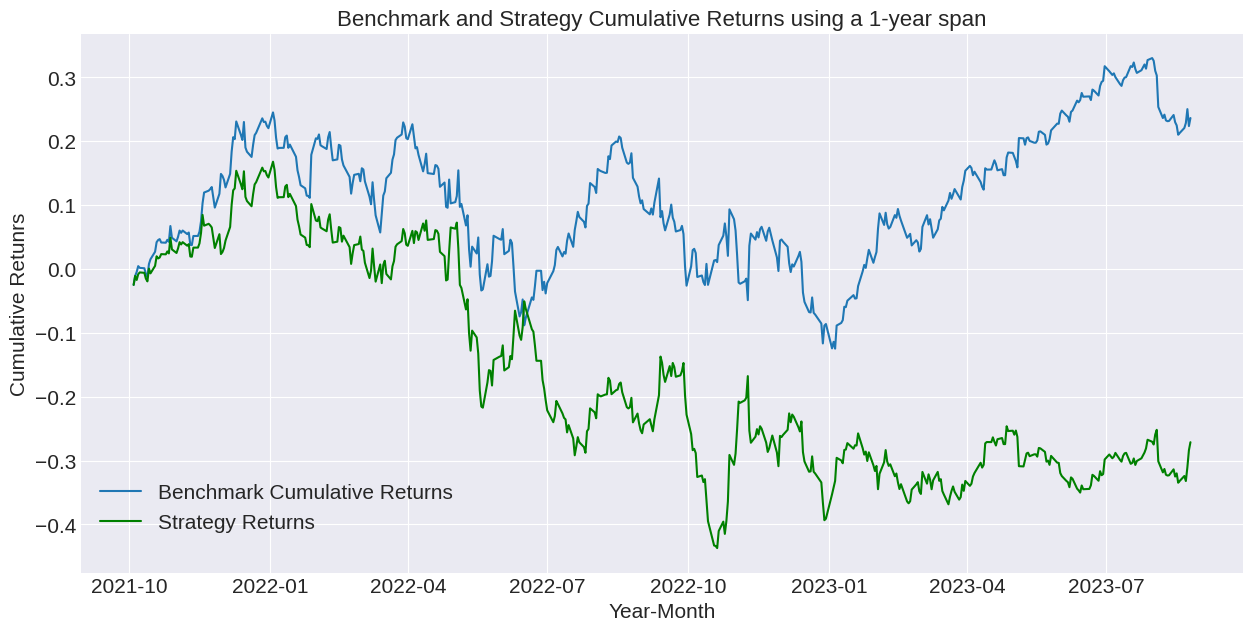

In [16]:
# Set the figure size
plt.figure(figsize=(15,7))

# Plot both the benchmark and strategy returns
plt.plot(df_results.index, df_results['Benchmark'], label = "Benchmark Cumulative Returns")
plt.plot(df_results.index, df_results['Stra_cum_returns'], label = "Strategy Returns", color='g')

# Set the title of the graph
plt.title('Benchmark and Strategy Cumulative Returns using a 1-year span', fontsize=16)

# Set the x- and y- axis labels and ticks sizes
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Cumulative Retunrs', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

# Set the plot legend location
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,0.2))


plt.show()